# Sentiment Analysis of Home Loan User Reviews

### Load Packages

In [1]:
import graphlab as gl

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1485548733.log


This non-commercial license of GraphLab Create for academic use is assigned to karthi.aru@gmail.com and will expire on May 31, 2017.


### Load data

In [3]:
df = gl.SFrame.read_csv('bb_reviews.csv')

Finished parsing file /Users/Karthik/Documents/Projects/projects/sentiment-home-loan/bb_reviews.csv

Parsing completed. Parsed 100 lines in 0.092186 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Karthik/Documents/Projects/projects/sentiment-home-loan/bb_reviews.csv

Parsing completed. Parsed 7035 lines in 0.08655 secs.

In [4]:
df

bank,city,review,date
ALLAHABAD BANK,ghaziabad,I have closed the housingloan with Allahabad Bank ...,"Jun 04, 2015"
ALLAHABAD BANK,ranchi,I have a Home loanrunning with Allahabad ...,"Apr 07, 2015"
ALLAHABAD BANK,kolkata,ALLAHABAD BANK peoplewere very cooperative. ...,"Feb 24, 2015"
ALLAHABAD BANK,coimbatore,In 13 working days theAllahabad bank has ...,"Jan 04, 2015"
ALLAHABAD BANK,lucknow,I got the home loan withallahabad bank and the ...,"Dec 09, 2014"
ALLAHABAD BANK,ghaziabad,It is a government bankand they are good in ...,"Oct 20, 2014"
ALLAHABAD BANK,bangalore,The rate of interestoffered by Allahabad for ...,"Oct 12, 2014"
ALLAHABAD BANK,kolkata,I am holding thisAllahabad housing loan ...,"Oct 07, 2014"
ALLAHABAD BANK,bangalore,Allahabad bank has givenme a home at an interest ...,"Sep 25, 2014"
ALLAHABAD BANK,bangalore,The services was goodwhen I applied for a ...,"Jan 19, 2014"


In [5]:
model = gl.load_model('./model')

In [6]:
model.summary()

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 2278286
Number of examples             : 1267133
Number of classes              : 2
Number of feature columns      : 1
Number of unpacked features    : 2278285

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.05

Training Summary
----------------
Solver                         : auto
Solver iterations              : 10
Solver status                  : TERMINATED: Iteration limit reached.
Training time (sec)            : 39.9574

Settings
--------
Log-likelihood                 : 68620.2104

Highest Positive Coefficients
-----------------------------
bow[streaming/gaming.]         : 15.1311
bow[whole....]                 : 15.0669
bow[2bd/3bath,]                : 13.9028
bow[later...there]             : 13.6987
bow[cris']                     : 13.6801

Lowest Negative Coefficients
----------------------------
bow[$136.]              

In [7]:
df['sentiment'] = df['review'].apply(lambda x : model.predict_row({'text': x}))

In [8]:
df

bank,city,review,date,sentiment
ALLAHABAD BANK,ghaziabad,I have closed the housingloan with Allahabad Bank ...,"Jun 04, 2015",0.303764227889
ALLAHABAD BANK,ranchi,I have a Home loanrunning with Allahabad ...,"Apr 07, 2015",0.916230442391
ALLAHABAD BANK,kolkata,ALLAHABAD BANK peoplewere very cooperative. ...,"Feb 24, 2015",0.838324006507
ALLAHABAD BANK,coimbatore,In 13 working days theAllahabad bank has ...,"Jan 04, 2015",0.366995847358
ALLAHABAD BANK,lucknow,I got the home loan withallahabad bank and the ...,"Dec 09, 2014",0.821753315717
ALLAHABAD BANK,ghaziabad,It is a government bankand they are good in ...,"Oct 20, 2014",0.708012535386
ALLAHABAD BANK,bangalore,The rate of interestoffered by Allahabad for ...,"Oct 12, 2014",0.381082785872
ALLAHABAD BANK,kolkata,I am holding thisAllahabad housing loan ...,"Oct 07, 2014",0.586101081684
ALLAHABAD BANK,bangalore,Allahabad bank has givenme a home at an interest ...,"Sep 25, 2014",0.225229566187
ALLAHABAD BANK,bangalore,The services was goodwhen I applied for a ...,"Jan 19, 2014",0.88802652859


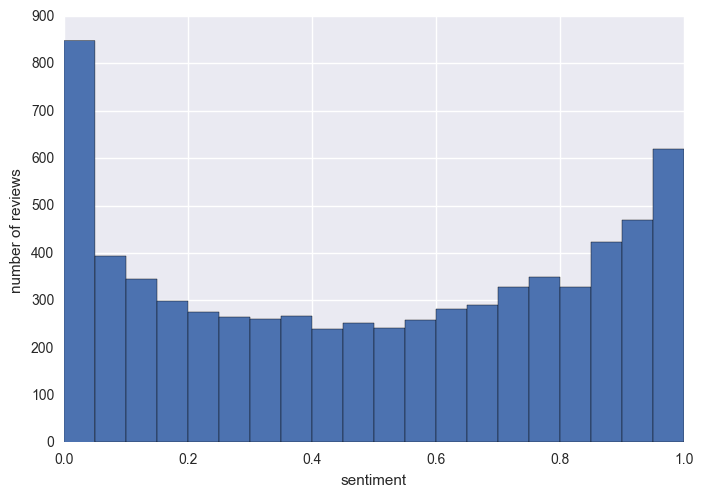

In [9]:
_ = plt.hist(df['sentiment'], bins=20) #use np.sqrt()
_ = plt.xlabel('sentiment')
_ = plt.ylabel('number of reviews')
plt.show()

### Top +ve and -ve reviews

In [10]:
df.topk('sentiment', k=3)['review']

dtype: str
Rows: 3
['I had a wonderful experience with IndiaBulls while getting this Home loan.The process was very quick and the documents required was minimal as well.The customer service provided is really good and the loan was disbursed within 10 days of time and I have recommended this institue to many of my friends.I feel it was excellent job done by India Bulls and the interest rate offered was around 10.75% which is nominal rate.', 'The service is good from Canfin homes ltd and there paper works are very fast. They are more flexible in terms and conditions and we can also bargain for the best interest rate which will be provided based on our profile. I got my home loan within 3 days. Interest rate charged was .25% higher than other bank but it was affordable since one year back. Processing fee charged was nominal.Customer service is also flexible as they give SMS alert for the process. Those who want the loan faster loan with flexibility i will recommend them for Canfin homes l

In [11]:
df.topk('sentiment', k=3, reverse=True)['review']

dtype: str
Rows: 3
['I had a home loan with a private bank and i wanted to transfer the loan to PNB. I lost my piece of mind from day 1 of the processing. The Sales person was so dumb that he promised to deliver the sanction letter next day without even checking my documents. I had to follow him every day and hear new stories daily and the process finally got over nearly after 45 days. The sales person was so responsive that he gave me the cheque after 3 days of receiving it and i had to pay around 3500 due to his sad attitude. Worst to follow, I had responded to an email asking them not to deposit the initial cheque as agreed with the customer service representative. They were very prompt in depositing the cheque despite the email and my credit ratings have still gone down. The worst thing is that I had to pay Rs.1200 for every day from oct 14 - jan 15 as penality to my previous bank due to the delay in service. PNB does help you in making you a full time beggar... I would not recomme

### Split to +ve and -ve reviews

In [10]:
pos = df[df['sentiment'] > 0.5] 
neg = df[df['sentiment'] < 0.5] 

In [11]:
print len(pos)
print len(neg)

3590
3445


# Compute ngrams

In [12]:
# Function to add python dictionaries
def sum_dict(d1, d2):
    for key, value in d1.items():
        d1[key] = value + d2.get(key, 0)    
    return d1

### ngrams from +ve reviews

In [13]:
pos['ngram1'] = gl.text_analytics.count_ngrams(pos['review'], 1, to_lower=True)
pos['ngram2'] = gl.text_analytics.count_ngrams(pos['review'], 2, to_lower=True)
pos['ngram3'] = gl.text_analytics.count_ngrams(pos['review'], 3, to_lower=True)

pos_ngram1 = reduce(sum_dict, pos['ngram1'])
pos_ngram2 = reduce(sum_dict, pos['ngram2'])
pos_ngram3 = reduce(sum_dict, pos['ngram3'])

In [14]:
print "\n1 Gram: \n", sorted(pos_ngram1.items(), key=lambda x: (x[1],x[0]), reverse=True)
print "\n2 Gram: \n", sorted(pos_ngram2.items(), key=lambda x: (x[1],x[0]), reverse=True)
print "\n3 Gram: \n", sorted(pos_ngram3.items(), key=lambda x: (x[1],x[0]), reverse=True)


1 Gram: 
[('the', 14372), ('loan', 6607), ('i', 6533), ('was', 6066), ('and', 4647), ('with', 3918), ('of', 3761), ('home', 3591), ('bank', 3267), ('rate', 2951), ('a', 2924), ('interest', 2695), ('process', 2108), ('have', 2010), ('very', 1979), ('as', 1403), ('processing', 1287), ('offered', 891), ('which', 751), ('took', 586), ('documentation', 476), ('about', 472), ('quite', 420), ('fee', 407), ('only', 338), ('an', 309), ('easy', 268), ('25', 176), ('branch', 168), ('nice', 124), ('helpful', 118), ('11', 100), ('friendly', 93), ('manager', 61), ('minimal', 56), ('12', 53), ('off', 48), ('recently', 42), ('waived', 36), ('hours', 21), ('running', 15), ('allahabad', 13), ('gesture', 2)]

2 Gram: 
[('home loan', 3457), ('interest rate', 1517), ('i have', 1147), ('rate of', 1062), ('and the', 811), ('was very', 609), ('the process', 570), ('the processing', 556), ('a home', 448), ('i was', 393), ('was a', 387), ('processing fee', 374), ('was quite', 222), ('the documentation', 198), 

### ngrams from -ve reviews

In [15]:
neg['ngram1'] = gl.text_analytics.count_ngrams(neg['review'], 1, to_lower=True)
neg['ngram2'] = gl.text_analytics.count_ngrams(neg['review'], 2, to_lower=True)
neg['ngram3'] = gl.text_analytics.count_ngrams(neg['review'], 3, to_lower=True)

neg_ngram1 = reduce(sum_dict, neg['ngram1'])
neg_ngram2 = reduce(sum_dict, neg['ngram2'])
neg_ngram3 = reduce(sum_dict, neg['ngram3'])

In [17]:
print "\n1 Gram: \n", sorted(neg_ngram1.items(), key=lambda x: (x[1],x[0]), reverse=True)
print "\n2 Gram: \n", sorted(neg_ngram2.items(), key=lambda x: (x[1],x[0]), reverse=True)
print "\n3 Gram: \n", sorted(neg_ngram3.items(), key=lambda x: (x[1],x[0]), reverse=True)


1 Gram: 
[('the', 14618), ('i', 7234), ('loan', 6435), ('was', 5760), ('to', 4648), ('and', 4318), ('for', 3641), ('of', 3531), ('with', 3385), ('bank', 3139), ('rate', 2806), ('interest', 2624), ('a', 2613), ('have', 2124), ('it', 1819), ('that', 1675), ('them', 1673), ('processing', 1552), ('housing', 1188), ('on', 1139), ('time', 1038), ('by', 966), ('be', 903), ('charges', 890), ('got', 888), ('so', 762), ('were', 660), ('amount', 642), ('days', 522), ('will', 443), ('one', 418), ('customers', 363), ('within', 331), ('services', 331), ('disbursed', 252), ('really', 237), ('floating', 208), ('closed', 199), ('online', 180), ('based', 148), ('nominal', 138), ('payment', 127), ('improve', 117), ('way', 67), ('want', 59), ('money', 55), ('single', 37), ('helpful', 31), ('allahabad', 5), ('thirty', 4)]

2 Gram: 
[('the loan', 1527), ('interest rate', 1464), ('i have', 1155), ('loan with', 799), ('the interest', 667), ('housing loan', 647), ('and the', 643), ('loan amount', 372), ('the 